In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1e-2
end_lr = 1e-4

window_size = 1
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [3]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=1, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [4]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.005 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : nan - Standard Deviation : nan
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.08 Second
MSE : nan - Standard Deviation : nan
------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

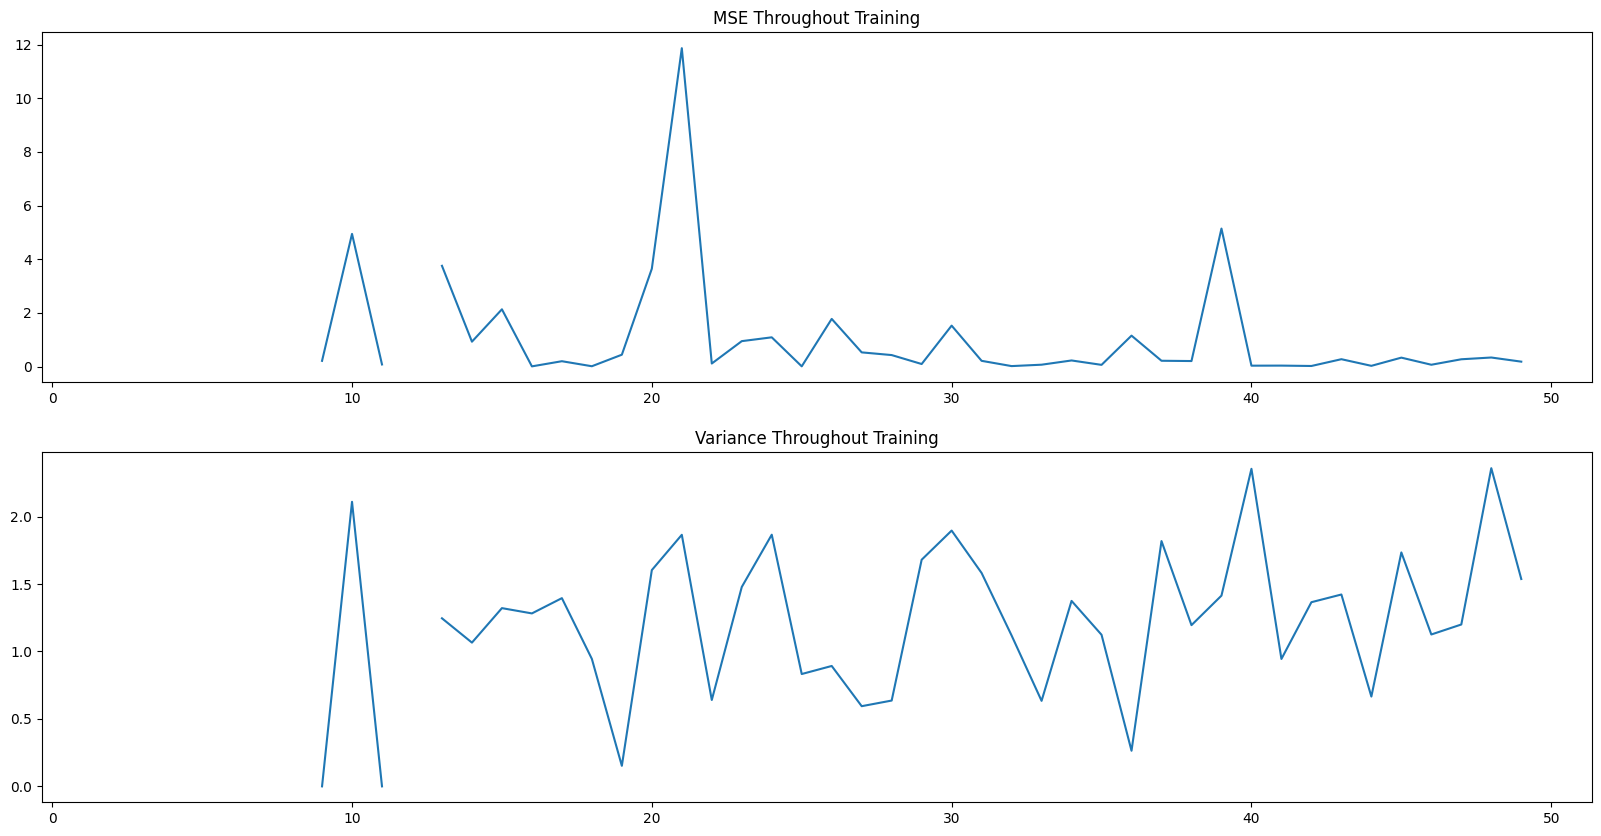

In [5]:
bnn.visualize_performance()

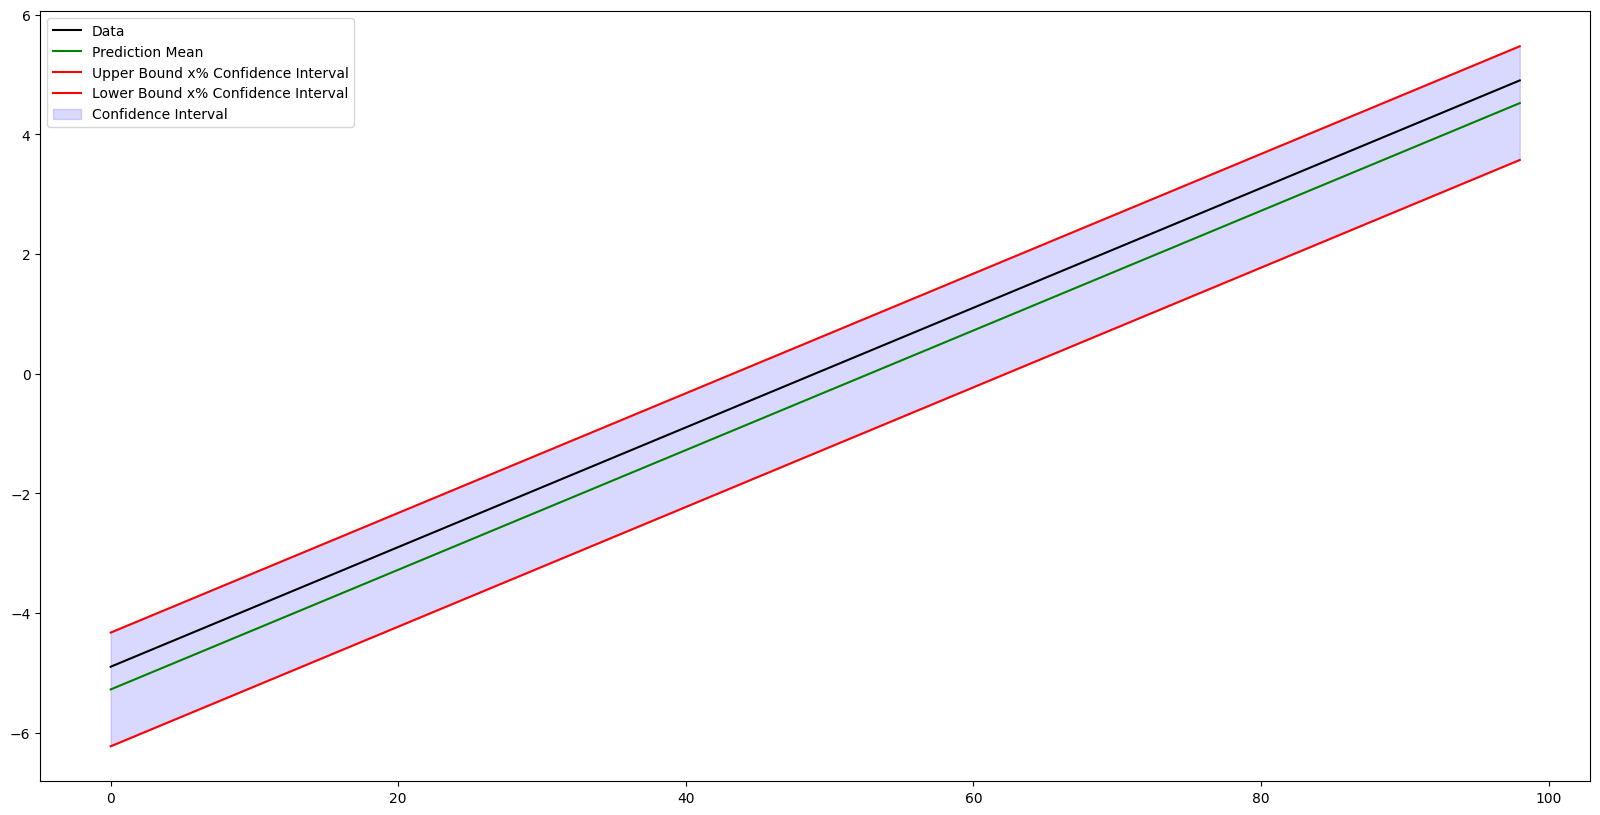

In [6]:
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [7]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data[:-1]
target_data = y_data[1:]

total_epochs = 50
initial_lr = 1e-1
end_lr = 1e-4

window_size = 1
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [8]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [9]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.005 - Succesfull Train Percentage : 100.0% - Time Passed : 0.1 Second
MSE : 1.3665393552543745 - Standard Deviation : 1.138006661477972
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : 0.9330135919428734 - Standard Deviation : 0.8934900824390927
------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------

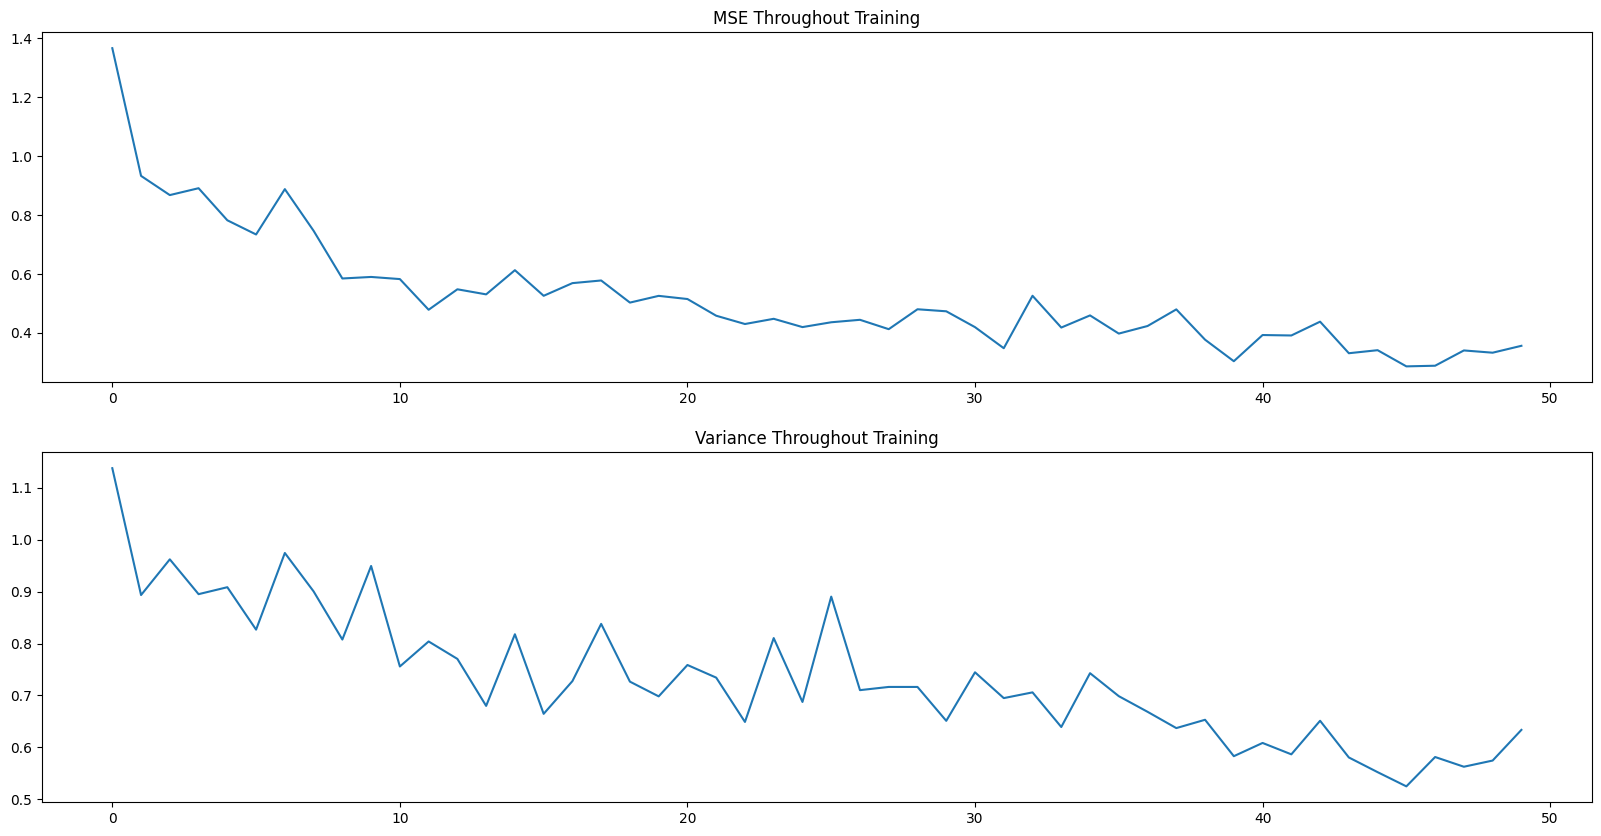

In [10]:
bnn.visualize_performance()

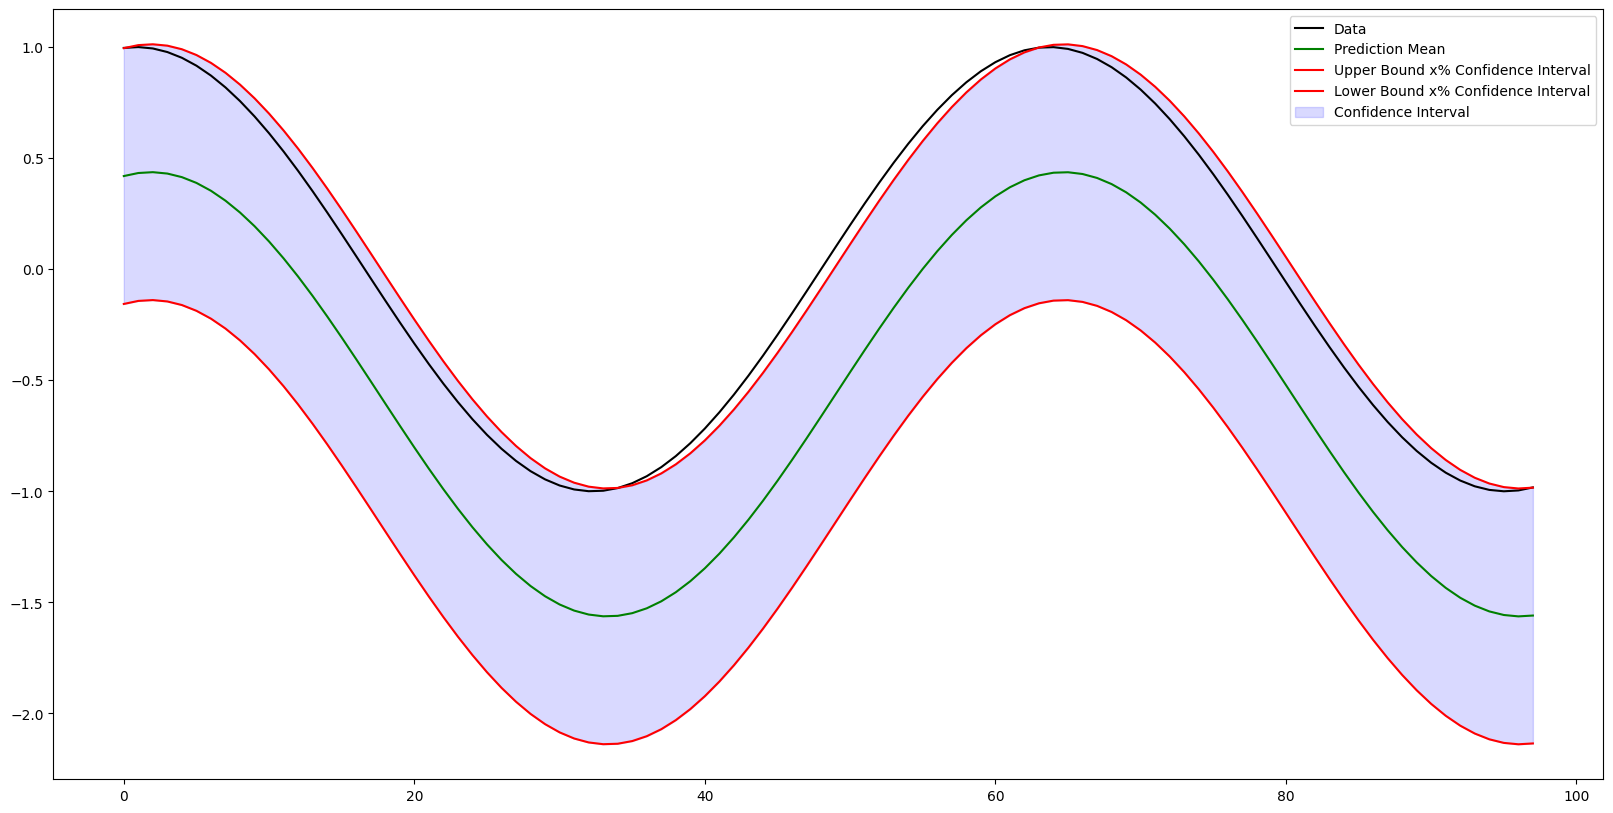

In [11]:
bnn.visualize_predictions_on_seen_data()

# Model Performance On Multiple Inputs

## On Linear Data

In [12]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1
end_lr = 1e-3

window_size = 2
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [13]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [14]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.13 Second
MSE : 0.38212437904850094 - Standard Deviation : 0.21418933457487657
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.13 Second
MSE : 0.30557919833948244 - Standard Deviation : 0.1388094941635795
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------

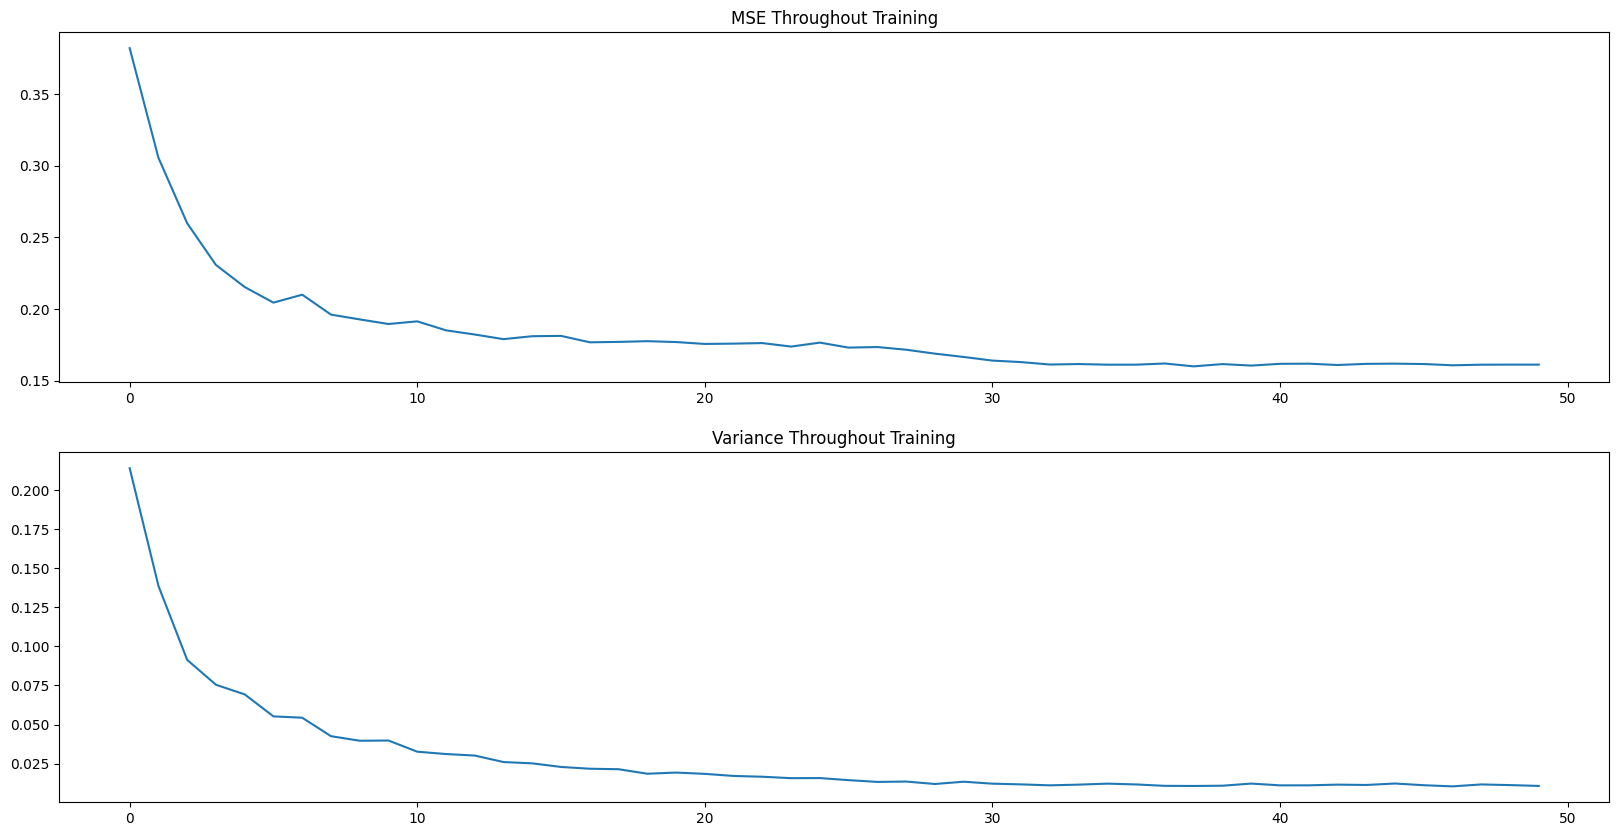

In [15]:
bnn.visualize_performance()

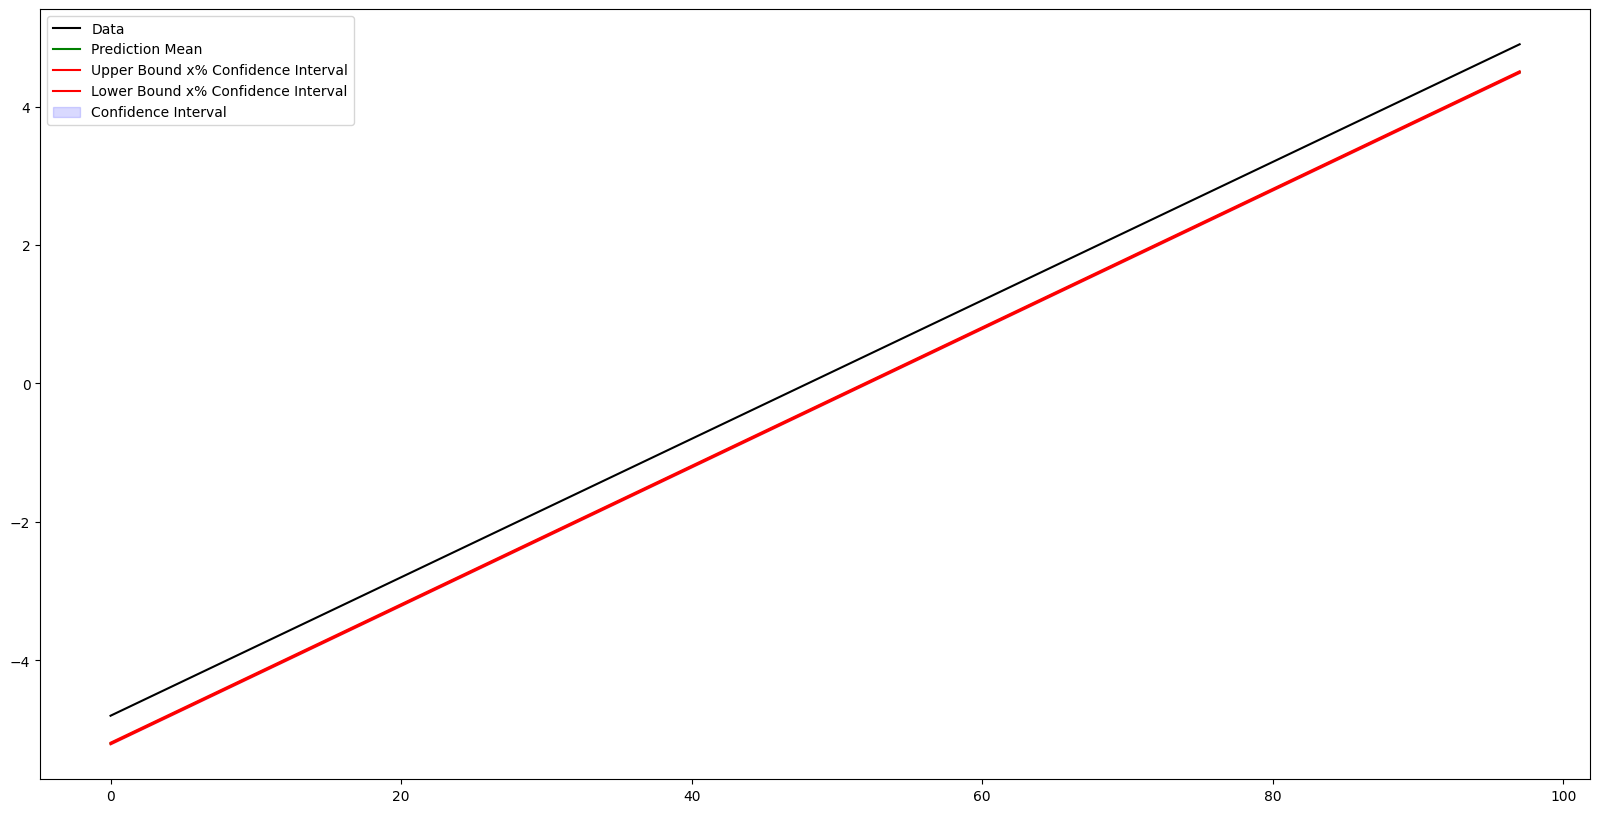

In [16]:
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [17]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1e-2
end_lr = 1e-6

window_size = 2
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [18]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [19]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 5e-05 - Succesfull Train Percentage : 35.714285714285715% - Time Passed : 0.13 Second
MSE : 7.112290462877505 - Standard Deviation : 0.1599029502912689
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 2.5e-05 - Succesfull Train Percentage : 0.0% - Time Passed : 0.12 Second
MSE : 7.132939225175504 - Standard Deviation : 0.1615540144163949
------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------

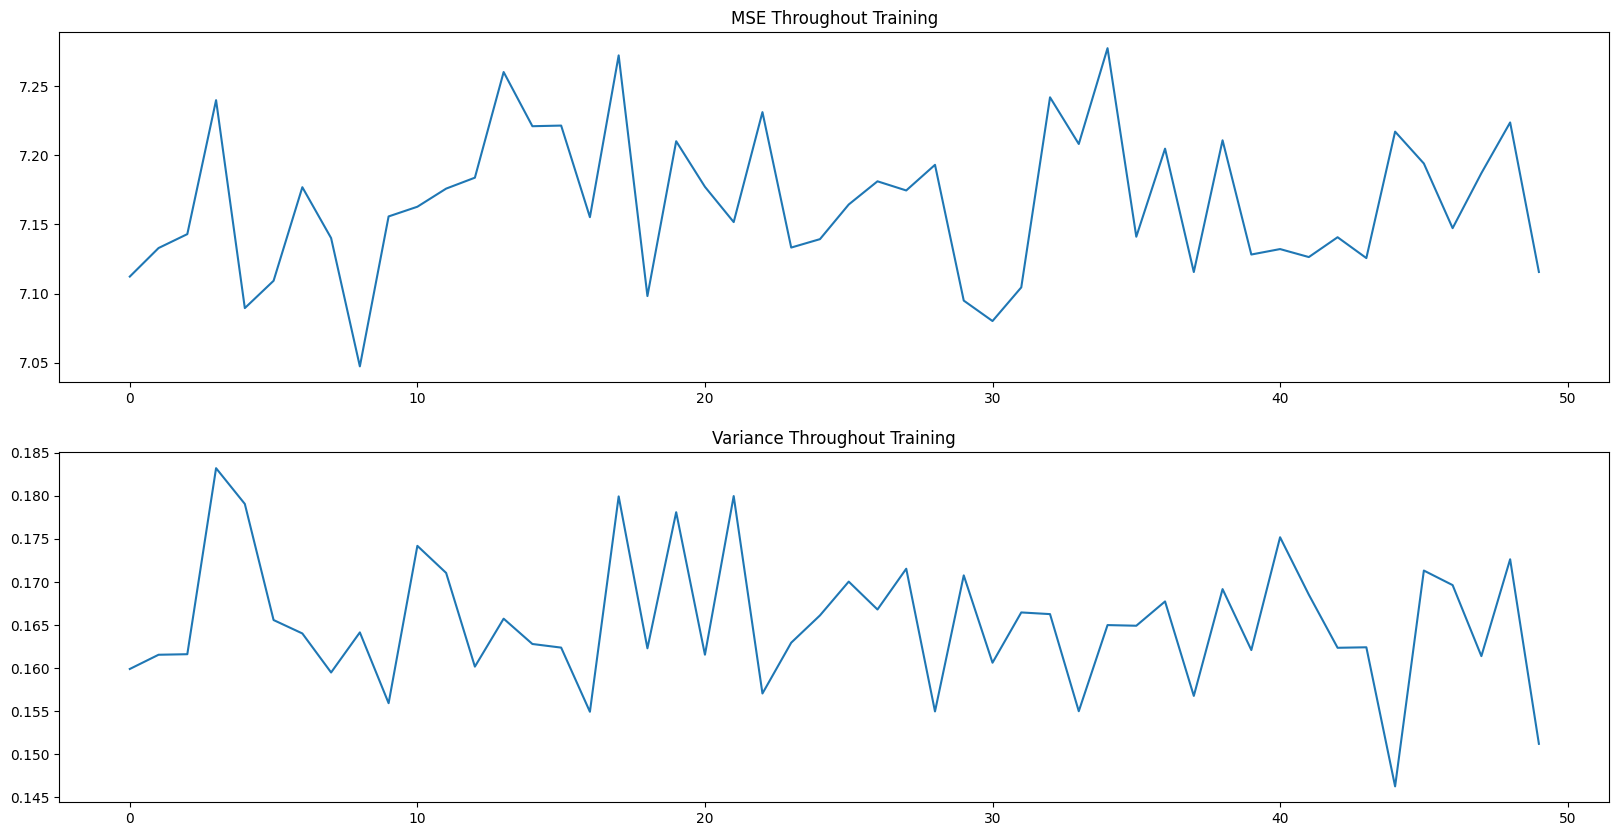

In [20]:
bnn.visualize_performance()

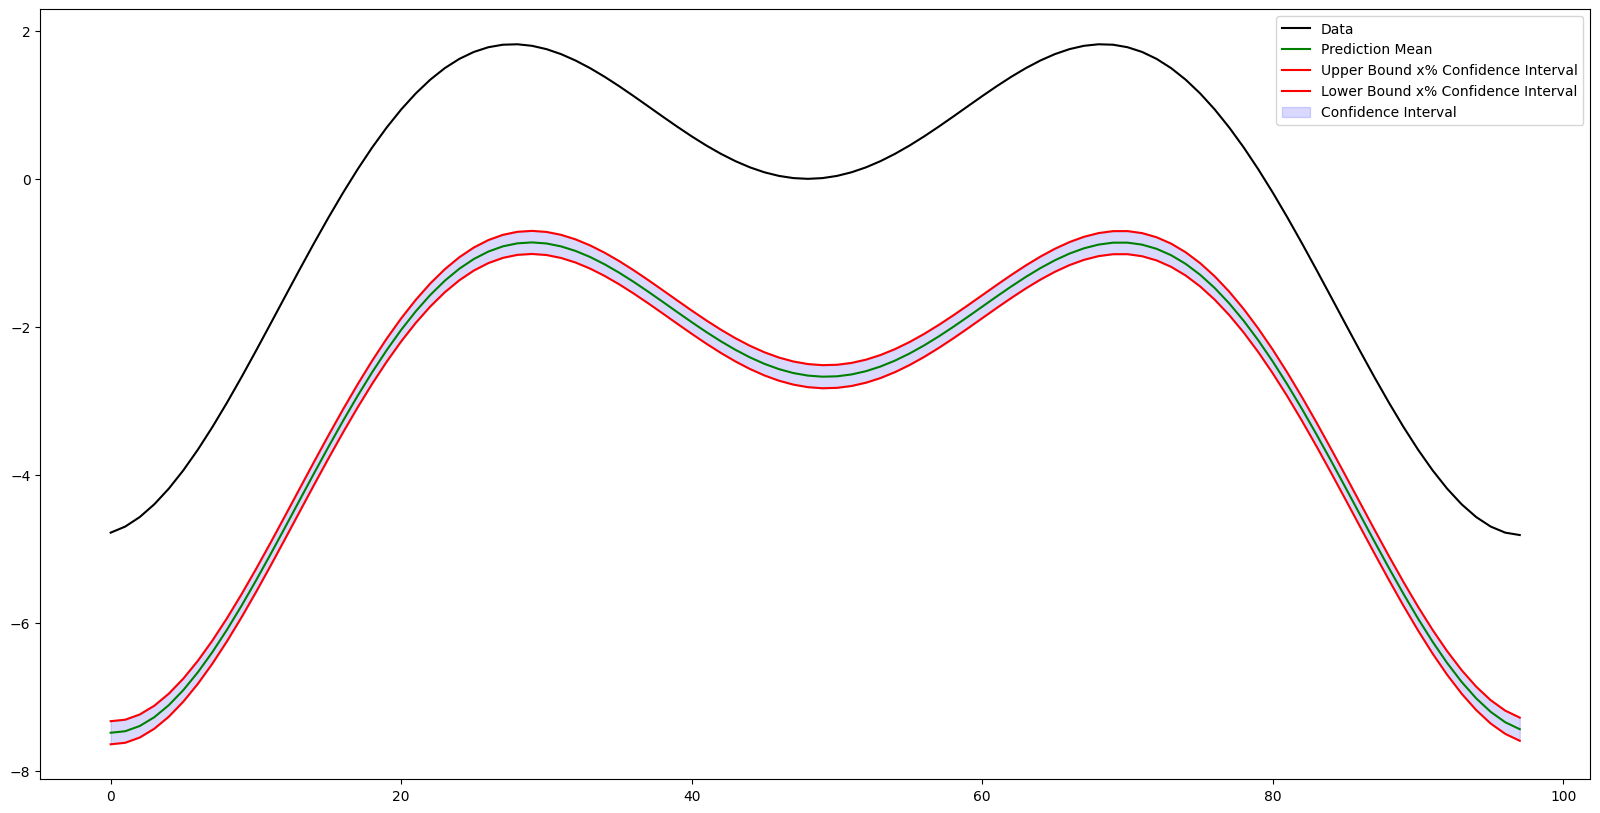

In [21]:
bnn.visualize_predictions_on_seen_data()

# Model Learning Rate Tuning

In [22]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

initial_lr_power = 1
end_lr_power = 4
total_iters = 8
tuning_epochs = 25
window_size = 1

error_type = 'mse'

In [23]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, 
                                         hidden_layers, 
                                         output_layer, 
                                         feature_data, 
                                         target_data, 
                                         error_type, 
                                         window_size=window_size,
                                         initial_lr_power=initial_lr_power, 
                                         end_lr_power=end_lr_power, 
                                         total_iters=total_iters, 
                                         tuning_epochs=tuning_epochs)

In [24]:
bnn_lr_tuning.learning_rate_tuning()

------------------------------------------------------------------------------------------------------------------------------------------------------
Iterations : 1 / 8 - Learning Rate : 0.1 - Succesfull Train Percentage : 0.0% - Time Passed : 1.89 Second
MSE : 1.7985878631075329e-06 - Standard Deviation : 0.001154151088892682
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Iterations : 2 / 8 - Learning Rate : 0.042169650342858224 - Succesfull Train Percentage : 0.0% - Time Passed : 1.93 Second
MSE : 3.496182391099368e-05 - Standard Deviation : 0.00613360476417425
------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------

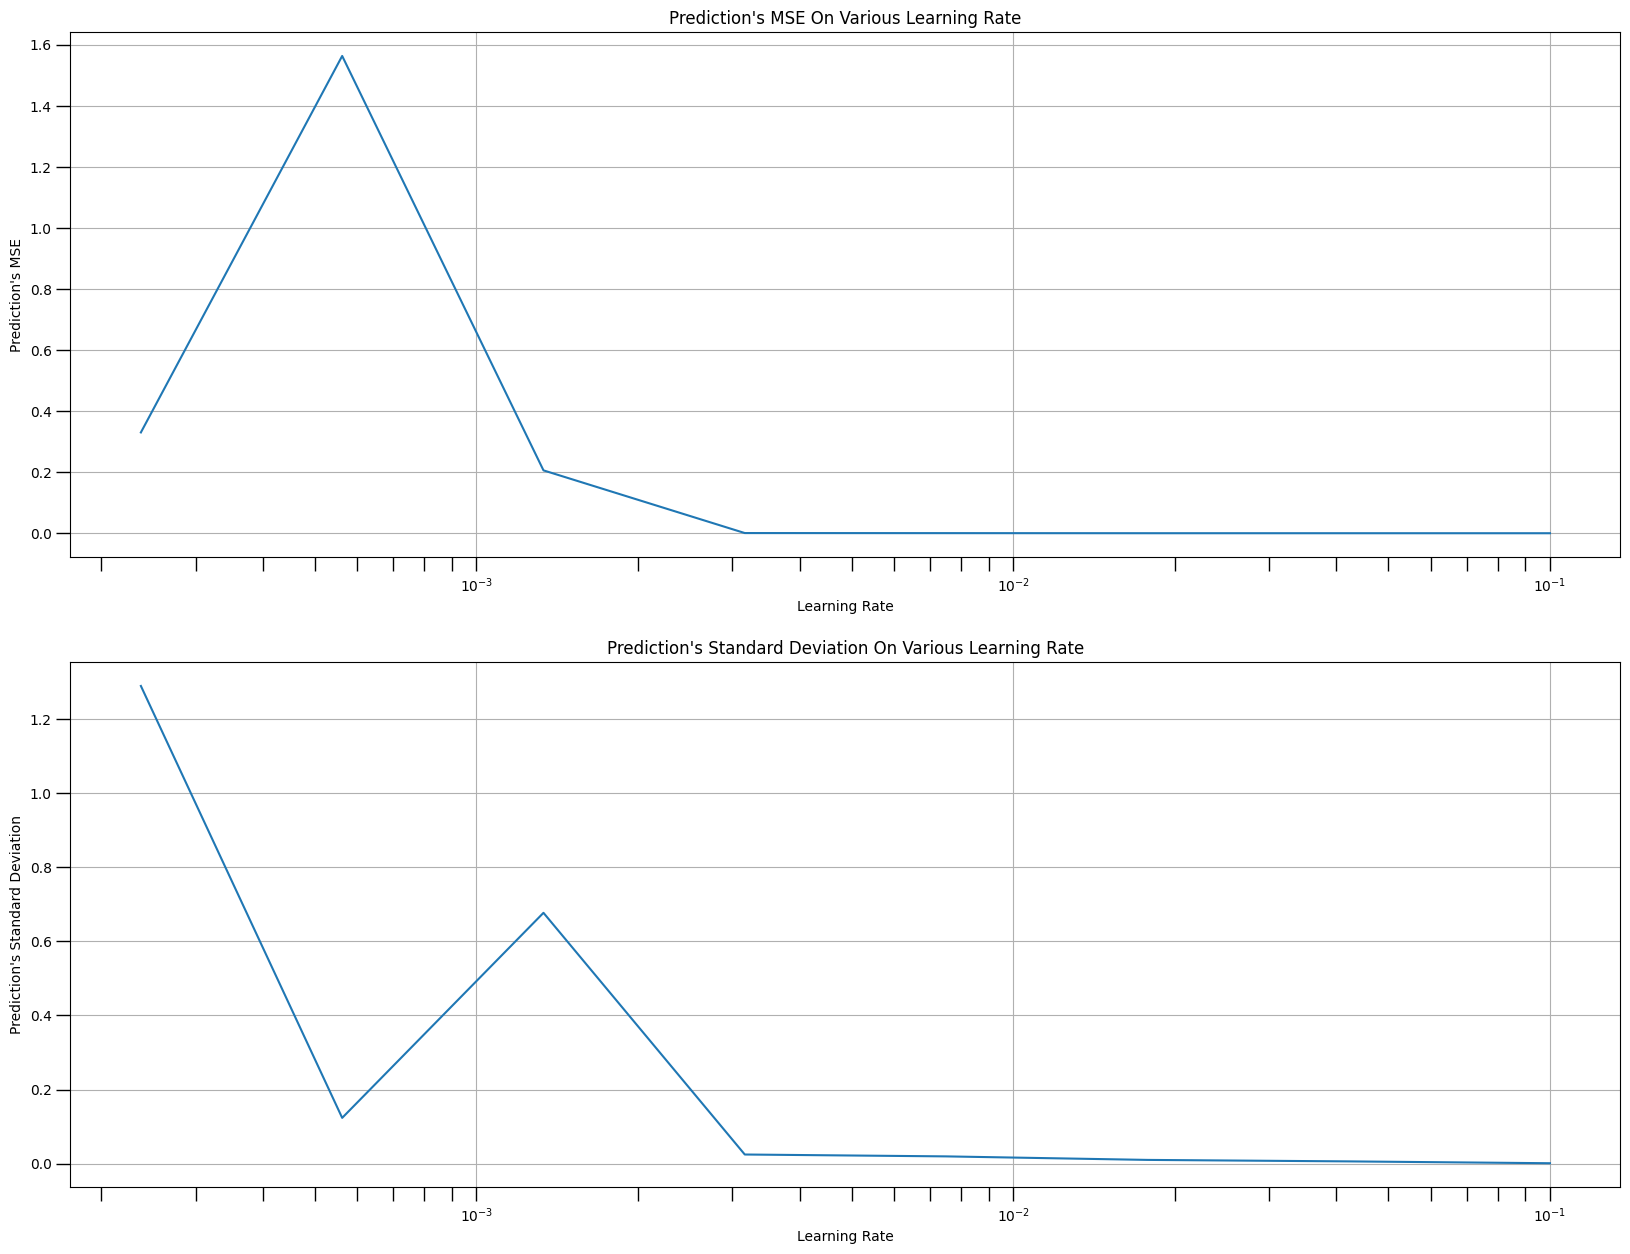

In [25]:
bnn_lr_tuning.visualize_learning_rate_tuning()

# Model Performance On Data With Outliers

## Data Preparation

In [ ]:
x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

y_data[-5] *= 0.75
y_data[15] *= 2
y_data[40] *= 0.1
y_data[70] *= 0.5
y_data[-20] *= 2.5

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.plot(x_data, y_data)

## Learning Rate Tuning

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

initial_lr_power = 1
end_lr_power = 20
total_iters = 100
tuning_epochs = 25
window_size = 3

In [ ]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr_power, end_lr_power=end_lr_power, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [ ]:
bnn_lr_tuning.learning_rate_tuning()

In [ ]:
bnn_lr_tuning.visualize_learning_rate_tuning()

## Model Fitting and Performances

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

window_size = 3
initial_lr = 1e-5
end_lr = 1e-10

total_epochs = 100
learning_rate_decay_type = 'exponential'

In [ ]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [ ]:
bnn.train_model(total_epochs, learning_rate_decay_type)

In [ ]:
bnn.visualize_performance()

In [ ]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()